# NeuroGym

NeuroGym is a comprehensive toolkit that allows training any network model on many established neuroscience tasks using Reinforcement Learning techniques. It includes working memory tasks, value-based decision tasks and context-dependent perceptual categorization tasks.

In this notebook we first show how to install the relevant toolbox. 

We then show how to access the available tasks and their relevant information.

Finally we train an LSTM network on the Random Dots Motion task using the A2C algorithm [Mnih et al. 2016](https://arxiv.org/abs/1602.01783) implemented in the [stable-baselines](https://github.com/hill-a/stable-baselines) toolbox, and plot the results.

You can easily change the code to train a network on any other available task or using a different algorithm (e.g. ACER, PPO2).

TODO: Make this not just usable in google colab

### Installation

In [0]:
%tensorflow_version 1.x
# Install gym
! pip install gym
# Install neurogym
! git clone https://github.com/gyyang/neurogym.git
%cd neurogym/
! pip install -e .
# Install stable-baselines
! pip install --upgrade stable-baselines

### Make a task

### PerceptualDecisionMaking
Logic: Random dot motion task. Two-alternative forced choice task in which the subject has to integrate two stimuli to decide which one is higher on average.
Reference paper: 
[The analysis of visual motion: a comparison of neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)
Default Period timing (ms) 
fixation : constant 100
stimulus : constant 2000
decision : constant 100
Other parameters: 
stimEv : Controls the difficulty of the experiment. (def: 1.)
Tags: perceptual, two-alternative, supervised.



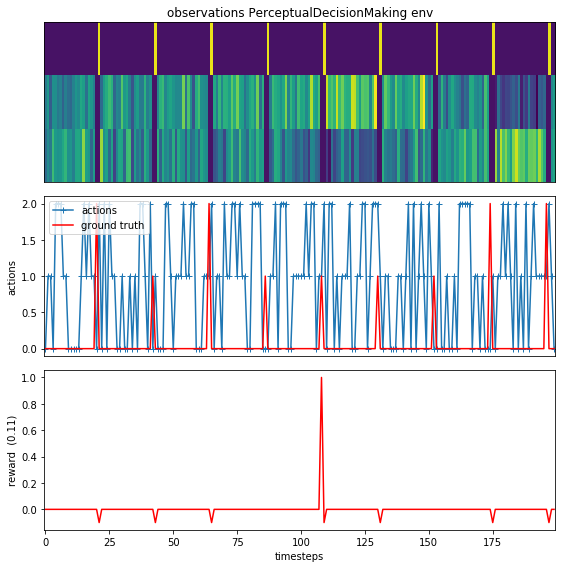

In [7]:
import gym
import neurogym as ngym

name = 'PerceptualDecisionMaking-v0'
timing = {'fixation': ('constant', 200),
          'stimulus': ('constant', 500),
          'decision': ('constant', 200)}
kwargs = {'dt': 100, 'timing': timing}
env = gym.make(name, **kwargs)
print(env)
data = ngym.utils.plot_env('PerceptualDecisionMaking-v0')

### Train a network

In [0]:
import warnings
from neurogym.wrappers import trial_hist
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2

warnings.filterwarnings('ignore')
warnings.filterwarnings('default')

env = gym.make(name, **kwargs)
# Apply the wrapper
env = trial_hist.TrialHistory(env, rep_prob=(.1, .9), block_dur=50)

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])

model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
model.learn(total_timesteps=1000000, log_interval=100000)
env.close()

# Visualize results

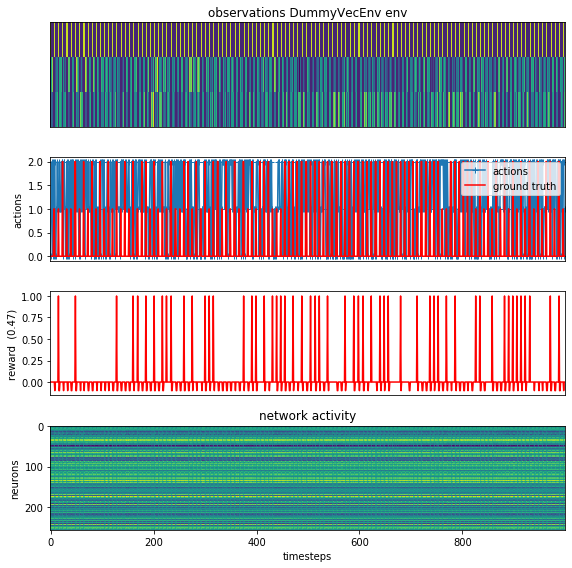

In [12]:
# Create task
env = gym.make(name, **kwargs)
# Apply the wrapper
env = trial_hist.TrialHistory(env, rep_prob=(.1, .9), block_dur=50)
env = DummyVecEnv([lambda: env])
data = ngym.utils.plot_env(env, num_steps_env=20000, num_steps_plt=1000,
                           model=model)